In [1]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '..')   
from model.LassoHomotopy import LassoHomotopyModel

#### Generate synthetic data for testing

In [2]:
np.random.seed(42)
n_samples, n_features = 100, 10
X = np.random.randn(n_samples, n_features)
true_coef = np.array([3, 0, -2, 0, 1, 0, 0, 0, 0, 0])  # Sparse coefficients
y = X @ true_coef + np.random.randn(n_samples) * 0.1  # Adding noise

#### Train Homotopy Lasso model


In [3]:
homotopy_model = LassoHomotopyModel(lambda_init=0.1)
homotopy_results = homotopy_model.fit(X, y)
y_pred_homotopy = homotopy_results.predict(X)

#### Train Sklearn Lasso model for comparison

In [4]:
lasso_model = Lasso(alpha=0.1, fit_intercept=False, max_iter=1000)
lasso_model.fit(X, y)
y_pred_sklearn = lasso_model.predict(X)

#### Calculate Mean Squared Error (MSE) for both models

In [5]:
mse_homotopy = mean_squared_error(y, y_pred_homotopy)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

## Plot Functions

#### Function to plot model coefficients


In [6]:
def plot_coefficients(homotopy_coefs, sklearn_coefs, true_coefs):
    plt.figure(figsize=(10, 5))
    indices = np.arange(len(true_coefs))
    plt.bar(indices - 0.2, true_coefs, width=0.2, label='True Coefficients', color='blue')
    plt.bar(indices, homotopy_coefs, width=0.2, label='Homotopy Lasso', color='red')
    plt.bar(indices + 0.2, sklearn_coefs, width=0.2, label='Sklearn Lasso', color='green')
    plt.xlabel("Feature Index")
    plt.ylabel("Coefficient Value")
    plt.title("Comparison of Coefficients")
    plt.legend()
    plt.show()

#### Function to plot predictions vs actual values

In [7]:
def plot_predictions(y_true, y_homotopy, y_sklearn):
    plt.figure(figsize=(10, 5))
    plt.scatter(y_true, y_homotopy, label='Homotopy Predictions', color='red', alpha=0.6)
    plt.scatter(y_true, y_sklearn, label='Sklearn Predictions', color='green', alpha=0.6)
    plt.plot(y_true, y_true, linestyle='dashed', color='black', label='Perfect Fit')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("Model Predictions vs True Values")
    plt.legend()
    plt.show()

## Plot results


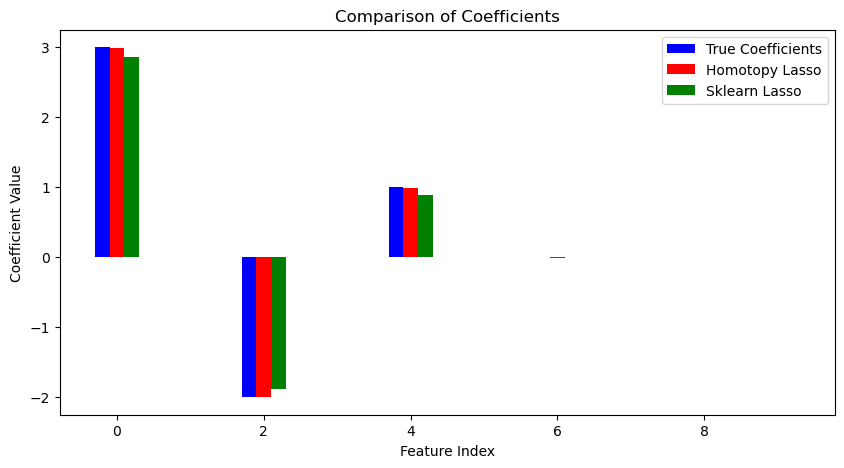

In [8]:
plot_coefficients(homotopy_results.theta, lasso_model.coef_, true_coef)

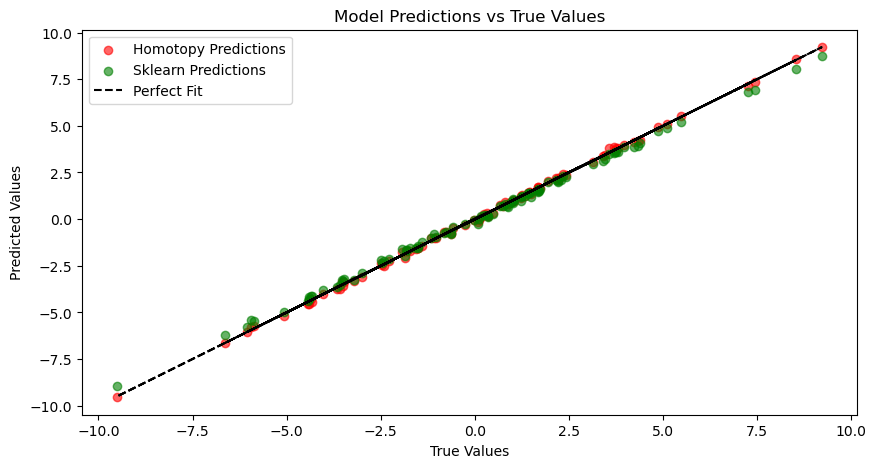

In [9]:
plot_predictions(y, y_pred_homotopy, y_pred_sklearn)

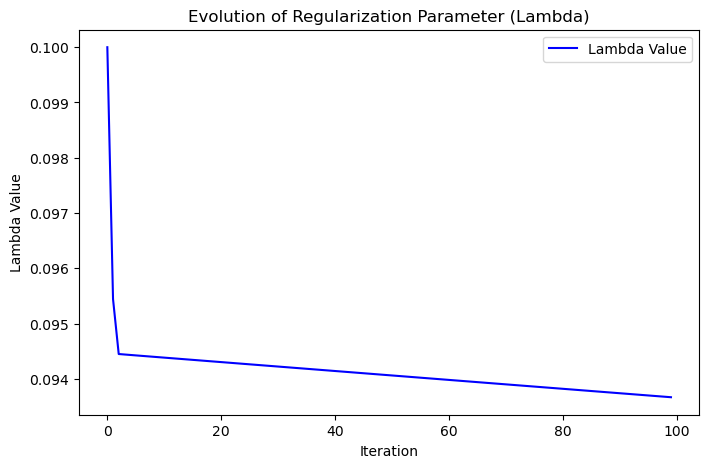

In [10]:
homotopy_model.plot_lambda_history()

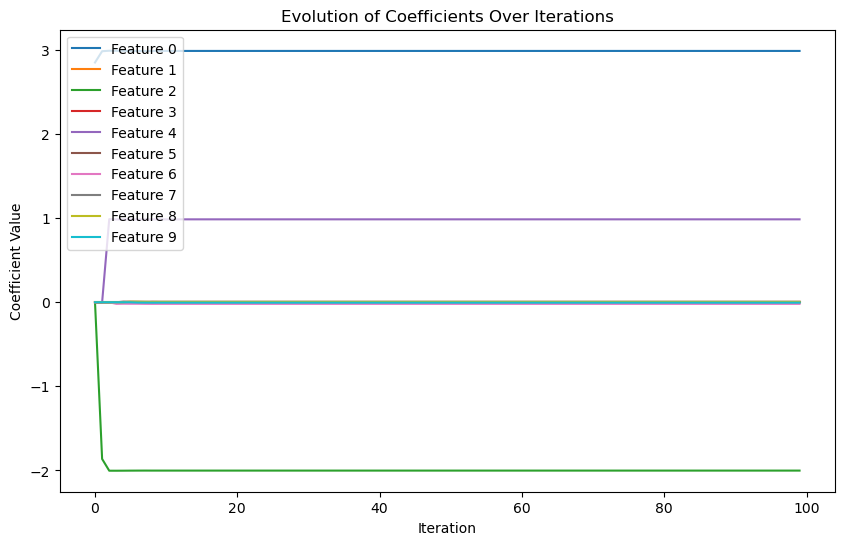

In [11]:
homotopy_model.plot_theta_history()

## Print Results

In [12]:
print(f"Homotopy Lasso Coefficients:\n{homotopy_results.theta}\n")
print(f"Sklearn Lasso Coefficients:\n{lasso_model.coef_}")

print(f"\nMean Squared Error (Homotopy Lasso): {mse_homotopy:.4f}")
print(f"Mean Squared Error (Sklearn Lasso): {mse_sklearn:.4f}")

Homotopy Lasso Coefficients:
[ 2.99020236 -0.00410891 -2.00240064  0.00321463  0.98679339  0.00581981
 -0.0188131   0.          0.00441135 -0.00436768]

Sklearn Lasso Coefficients:
[ 2.8595811  -0.         -1.88632827 -0.          0.88096871  0.
 -0.          0.          0.         -0.        ]

Mean Squared Error (Homotopy Lasso): 0.0086
Mean Squared Error (Sklearn Lasso): 0.0451
